<a href="https://colab.research.google.com/github/luiza-blota/Aulas-Python/blob/master/C%C3%B3digos_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm # biblioteca de modelagem estatística
import statsmodels.formula.api as smf

# Leitura dos Dados

In [2]:
clientes = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_customers_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_order_items_dataset.csv')
pagamentos = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_order_reviews_dataset.csv')
pedidos = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_orders_dataset.csv')
produtos = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_products_dataset.csv')
prod_catg = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/product_category_name_translation.csv')
vendedores = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_sellers_dataset.csv')
geolocalization = pd.read_csv('/content/drive/MyDrive/1. MBA - Data Science /TCC - MBA 2023/Datasets/olist_geolocation_dataset.csv')

# **Explorando Bases**

## *Base de Clientes*

In [3]:
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
clientes.info() ## 99.441 linhas de clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
estados_clientes = pd.DataFrame(clientes.customer_state.value_counts()/clientes.shape[0])
#estados_clientes.to_excel('estados_clientes.xlsx')
estados_clientes

,customer_state
SP,0.419807
RJ,0.129242
MG,0.117004
RS,0.054967
PR,0.050734
SC,0.036574
BA,0.033990
DF,0.021520
ES,0.020444
GO,0.020314


## *Base de Pagamentos*

In [6]:
pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
pagamentos.info() ## 103.886 linhas de pagamento 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
tb_formas_pagto = pd.DataFrame(pagamentos.payment_type.value_counts()) ## A maioria realiza o pagamento através do Cartão de Crédito
tb_formas_pagto['percentual'] = pagamentos.payment_type.value_counts()/clientes.shape[0]
#tb_formas_pagto.to_excel('tb_formas_pagto.xlsx')
tb_formas_pagto.head()

,payment_type,percentual
credit_card,76795,0.772267
boleto,19784,0.198952
voucher,5775,0.058075
debit_card,1529,0.015376
not_defined,3,0.000030


In [9]:
qtde_parcelas = pd.DataFrame (pagamentos.payment_installments.describe()) ## Em média os clientes pagam pelo menos em 2 prestações
#qtde_parcelas.to_excel('qtde_parcelas.xlsx')
pagamentos.payment_installments.describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [10]:
vlr_medio_pedidos = pd.DataFrame(pagamentos.payment_value.describe() )## O valor médio dos pedidos é de R$ 154,00
#vlr_medio_pedidos.to_excel('vlr_medio_pedidos.xlsx')
vlr_medio_pedidos.head()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000


In [11]:
pagamentos_pedido = pagamentos.loc[: , ['order_id', 'payment_value']]
pagamentos_pedido = pagamentos_pedido.drop_duplicates()
pagamentos_pedido2 = pagamentos_pedido.groupby(['order_id'] , as_index= False)
pagamentos_pedido3 = pagamentos_pedido2.agg('mean')
pagamentos_pedido3.head() ## (71, 8) 

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


## Base de Itens

In [12]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
items.order_item_id.describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

In [14]:
qtde_itens_pedido = pd.DataFrame(items.order_item_id.value_counts()/items.shape[0])
qtde_itens_pedido.to_excel('qtde_itens_pedido.xlsx')

In [15]:
items.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef" ') ## Pedido com 21 itens

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [16]:
base_itens = items.query('order_item_id > 1') ## Pedidos com mais de 1 item
base_itens.shape ## 13.984 itens de pedidos com mais de um item
base_itens.order_item_id.describe() ## Em média, pedidos com mais de 1 item, tem 2 itens. 

count    13984.000000
mean         2.593678
std          1.334476
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         21.000000
Name: order_item_id, dtype: float64

In [17]:
preco_itens = pd.DataFrame(items.price.describe()) # O valor médio do preço dos itens é R$120, mas um dos itens chega até a R$6.700 
preco_itens.to_excel('preco_itens.xlsx')

In [18]:
preco_frete = pd.DataFrame(items.freight_value.describe()) # Em média, o valor do frete é R$15, mas pode chegar até a R$409
preco_frete.to_excel('preco_frete.xlsx')

In [19]:
items.query('freight_value > 400') ## Frete acima de R$400

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


In [20]:
items.query('order_id == "e481f51cbdc54678b7cc49136f2d6af7" ') 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
100785,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72


## *Base de Vendedores*

In [21]:
vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [22]:
estados_vendedores = pd.DataFrame(vendedores.seller_state.value_counts()/vendedores.shape[0])
#estados_vendedores.to_excel('estados_vendedores.xlsx')
estados_vendedores

,seller_state
SP,0.597415
PR,0.112763
MG,0.078837
SC,0.061389
RJ,0.055250
RS,0.041680
GO,0.012924
DF,0.009693
ES,0.007431
BA,0.006139


In [23]:
cidades_vendedores = pd.DataFrame(vendedores.seller_city.value_counts()/vendedores.shape[0])
#estados_vendedores.to_excel('estados_vendedores.xlsx')
cidades_vendedores

,seller_city
sao paulo,0.224233
curitiba,0.041034
rio de janeiro,0.031018
belo horizonte,0.021971
ribeirao preto,0.016801
...,...
taruma,0.000323
s jose do rio preto,0.000323
domingos martins,0.000323
messias targino,0.000323


## *Base de Produtos*

In [24]:
produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
df_categoria_produtos = produtos.product_category_name.value_counts()/produtos.shape[0]
#df_categoria_produtos.to_excel('Categoria_Produtos.xlsx')
df_categoria_produtos

cama_mesa_banho                  0.091924
esporte_lazer                    0.087008
moveis_decoracao                 0.080635
beleza_saude                     0.074171
utilidades_domesticas            0.070863
                                   ...   
fashion_roupa_infanto_juvenil    0.000152
casa_conforto_2                  0.000152
pc_gamer                         0.000091
seguros_e_servicos               0.000061
cds_dvds_musicais                0.000030
Name: product_category_name, Length: 73, dtype: float64

In [26]:
df_categoria_produtos.shape

(73,)

In [27]:
produtos.nlargest(10, 'product_weight_g')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0
344,d0877f0094337c414d23f5a3c7bad20c,moveis_escritorio,48.0,489.0,2.0,30000.0,50.0,50.0,30.0
509,53f92b0474f91fcb5bd188c6a8075c38,utilidades_domesticas,54.0,2952.0,3.0,30000.0,76.0,51.0,51.0
955,ceeba7d5636e59173cc5f484e913db3d,NaN,NaN,NaN,NaN,30000.0,65.0,65.0,65.0
1159,f97ad9066c718a6cef93dfcf253d3e0d,moveis_decoracao,63.0,886.0,5.0,30000.0,61.0,70.0,65.0
1469,363a9f5b97bf194da23858be722a7aa5,construcao_ferramentas_construcao,44.0,1455.0,6.0,30000.0,100.0,50.0,50.0
1514,dcfeedf441c38e5e7e58ffce194af2bb,beleza_saude,50.0,193.0,1.0,30000.0,67.0,64.0,61.0
1701,1c57458e824ca3d974ec1831a1a55e72,pet_shop,57.0,794.0,3.0,30000.0,79.0,2.0,63.0
1714,c04e948c6900ce99ac47d89b3b6d70cd,cool_stuff,33.0,1401.0,2.0,30000.0,70.0,37.0,70.0
1738,0a859d8dc68f6a746b4709217110c439,esporte_lazer,50.0,2871.0,1.0,30000.0,90.0,50.0,50.0


In [28]:
produtos.product_name_lenght.describe()

count    32341.000000
mean        48.476949
std         10.245741
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64

In [29]:
produtos.product_description_lenght.describe()

count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64

In [30]:
qtde_fotos = pd.DataFrame(produtos.product_photos_qty.describe()) ## Em média, os anúncios tem 2 fotos / Mas existe algum produto que tem 20 fotos
#qtde_fotos.to_excel('qtde_fotos.xlsx')
qtde_fotos

,product_photos_qty
count,32341.000000
mean,2.188986
std,1.736766
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,20.000000


In [31]:
peso_produtos = pd.DataFrame(produtos.product_weight_g.describe()) ## Os produtos pesam em média 2 kg 
#peso_produtos.to_excel('peso_produtos.xlsx')
peso_produtos

,product_weight_g
count,32949.000000
mean,2276.472488
std,4282.038731
min,0.000000
25%,300.000000
50%,700.000000
75%,1900.000000
max,40425.000000


## *Base Pedidos*

In [32]:
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [33]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
pedidos.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [35]:
status_pedidos = pd.DataFrame(pedidos.order_status.value_counts()/pedidos.shape[0])
#status_pedidos.to_excel('status_pedidos.xlsx')
status_pedidos

,order_status
delivered,0.970203
shipped,0.011132
canceled,0.006285
unavailable,0.006124
invoiced,0.003158
processing,0.003027
created,0.000050
approved,0.000020


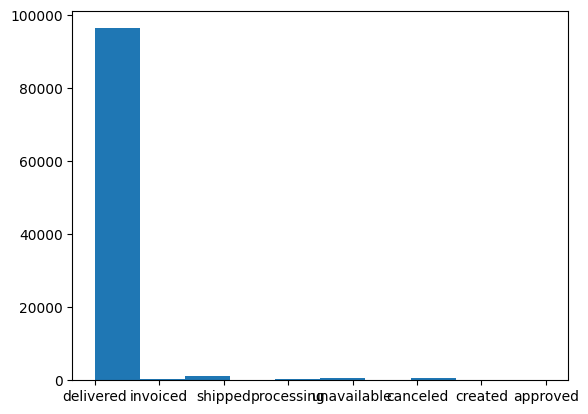

In [36]:
plt.hist(pedidos.order_status, rwidth=2)
plt.show()

### Transformação de Datas e Criando a Variável: Pedido Atrasado

In [37]:
## Tranformando em data a Data de Chegada
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])

In [38]:
## Transformando em data a Data Prevista
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])

In [39]:
## Criando uma coluna para ver a Diferença entre as duas datas acima
pedidos['diferenca_tempoentrega'] = pedidos['order_delivered_customer_date'] - pedidos['order_estimated_delivery_date']
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diferenca_tempoentrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6 days +15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18 days +18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13 days +00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10 days +18:17:02


In [40]:
pedidos['diferenca_tempoentrega_num'] = pd.to_numeric(pedidos['diferenca_tempoentrega'])
pedidos['Flag_Atrasado'] = np.where(pedidos['diferenca_tempoentrega_num'] <= 0, 'Adiantado', 'Atrasado')
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diferenca_tempoentrega,diferenca_tempoentrega_num,Flag_Atrasado
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13,-614087000000000,Adiantado
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6 days +15:27:45,-462735000000000,Adiantado
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18 days +18:06:29,-1490011000000000,Adiantado
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13 days +00:28:42,-1121478000000000,Adiantado
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10 days +18:17:02,-798178000000000,Adiantado


In [41]:
## Criando variável Atrasado 
Flag_Atrasado =pd.DataFrame(pedidos.Flag_Atrasado.value_counts()/clientes.shape[0]  ) # 7% dos pedidos chegaram atrasados
#Flag_Atrasado.to_excel('Flag_Atrasado.xlsx')
Flag_Atrasado

,Flag_Atrasado
Adiantado,0.92129
Atrasado,0.07871


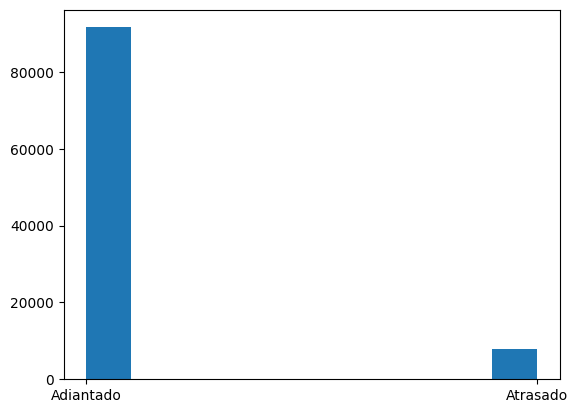

In [42]:
plt.hist(pedidos.Flag_Atrasado, rwidth=2)
plt.show()

## *Base Reviews*

In [43]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [44]:
reviews.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef" ') ## Pedido com 21 itens

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
14999,e8236fe7b6e1bdd513a500de361e2b87,8272b63d03f5f79c56e9e4120aec44ef,1,NaN,Eu estou tentando cancelar faz tempo devido o ...,2017-07-30 00:00:00,2017-07-30 14:19:07


In [45]:
tb_review_score = pd.DataFrame(reviews.review_score.value_counts()/reviews.shape[0])
#tb_review_score.to_excel('tb_review_score.xlsx')
tb_review_score

,review_score
5,0.577763
4,0.192917
1,0.115133
3,0.082430
2,0.031756


### Criando Variável Resposta: avaliações 

In [46]:
reviews['Target'] = np.where(reviews['review_score'] == 5, 0, 1)
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Target
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,0


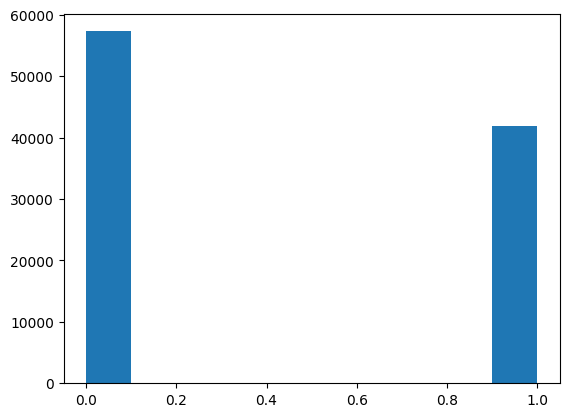

In [47]:
plt.hist(reviews.Target, rwidth=2)
plt.show()

In [48]:
tb_resposta = pd.DataFrame( reviews.Target.value_counts()/reviews.shape[0] ) ## Variável resposta balanceada :) 
tb_resposta

,Target
0,0.577763
1,0.422237


In [49]:
tb_target = reviews.loc[: , ['order_id', 'Target']]
tb_target.shape

(99224, 2)

# **Primeira Visão de Pedidos**

In [50]:
database = clientes.merge(right = pedidos, how = 'left', on = 'customer_id')
database = database.merge(right = pagamentos, on = 'order_id')
database = database.merge(right = items, on = 'order_id')
database = database.merge(right = produtos, on = 'product_id')
database = database.merge(right = reviews, on = 'order_id')
database = database.merge(right = prod_catg, on = 'product_category_name')
database = database.merge(right = vendedores, on = 'seller_id')
database = database.drop_duplicates()
database.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Target,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,office_furniture,8577,itaquaquecetuba,SP


In [51]:
##Quantidade de Linhas e de Colunas da base
database.shape

(115609, 44)

In [52]:
database.describe()

,customer_zip_code_prefix,diferenca_tempoentrega,diferenca_tempoentrega_num,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,Target,seller_zip_code_prefix
count,115609.000000,113209,1.156090e+05,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,-12 days +14:30:34.043583108,-1.924379e+17,1.093747,2.946233,172.387379,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409,0.434525,24515.713958
std,29841.671732,10 days 02:14:24.693627420,1.314921e+18,0.729849,2.781087,265.873969,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584,0.495697,27636.640968
min,1003.000000,-147 days +23:36:47,-9.223372e+18,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,1001.000000
25%,11310.000000,-17 days +16:13:21,-1.475218e+15,1.000000,1.000000,60.870000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,0.000000,6429.000000
50%,24241.000000,-13 days +22:21:25,-1.050481e+15,1.000000,2.000000,108.050000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,0.000000,13660.000000
75%,58745.000000,-7 days +10:48:57,-6.058940e+14,1.000000,4.000000,189.480000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,1.000000,28605.000000
max,99980.000000,188 days 23:24:07,1.632745e+16,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,1.000000,99730.000000


In [53]:
## Tipo de Dados das colunas da base
dtypes = database.dtypes
colunas_base = pd.DataFrame(data= dtypes)
print(colunas_base)
#colunas_base.to_excel('colunas_base.xlsx')

                                             0
customer_id                             object
customer_unique_id                      object
customer_zip_code_prefix                 int64
customer_city                           object
customer_state                          object
order_id                                object
order_status                            object
order_purchase_timestamp                object
order_approved_at                       object
order_delivered_carrier_date            object
order_delivered_customer_date   datetime64[ns]
order_estimated_delivery_date   datetime64[ns]
diferenca_tempoentrega         timedelta64[ns]
diferenca_tempoentrega_num               int64
Flag_Atrasado                           object
payment_sequential                       int64
payment_type                            object
payment_installments                     int64
payment_value                          float64
order_item_id                            int64
product_id   

## Union entre Clientes e Vendedores

In [54]:
clientes_e_vendedores = database.loc[: , ['customer_unique_id', 'customer_state', 'order_id','seller_id','seller_state']]
clientes_e_vendedores.head()

,customer_unique_id,customer_state,order_id,seller_id,seller_state
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,7c67e1448b00f6e969d365cea6b010ab,SP
1,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,7c67e1448b00f6e969d365cea6b010ab,SP
2,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,7c67e1448b00f6e969d365cea6b010ab,SP
3,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,7c67e1448b00f6e969d365cea6b010ab,SP
4,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,7c67e1448b00f6e969d365cea6b010ab,SP


## Visualização Gráfica dos MAPAS

In [55]:
customer = clientes_e_vendedores.loc[: , ['customer_unique_id', 'customer_state']]
customer = customer.drop_duplicates()
seller = clientes_e_vendedores.loc[: , ['seller_id', 'seller_state']]
seller = seller.drop_duplicates()

In [56]:
geolocalization.head()
geolocalization2 = geolocalization.loc[: , ['geolocation_state', 'geolocation_lat', 'geolocation_lng']]
geolocalization2.head()

,geolocation_state,geolocation_lat,geolocation_lng
0,SP,-23.545621,-46.639292
1,SP,-23.546081,-46.644820
2,SP,-23.546129,-46.642951
3,SP,-23.544392,-46.639499
4,SP,-23.541578,-46.641607


In [57]:
geolocalization3 = geolocalization2.groupby(['geolocation_state'] , as_index= False)
geolocalization4 = geolocalization3.agg('mean')
geolocalization4.head() #(27, 3) 

,geolocation_state,geolocation_lat,geolocation_lng
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430
3,AP,0.086025,-51.234304
4,BA,-13.049361,-39.560649


In [58]:
# Localização dos Clientes

cliente_localizacao = pd.merge(customer, geolocalization4, how = 'left', left_on = ['customer_state'], right_on = ['geolocation_state'] )
cliente_localizacao.head()

,customer_unique_id,customer_state,geolocation_state,geolocation_lat,geolocation_lng
0,861eff4711a542e4b93843c6dd7febb0,SP,SP,-23.155308,-47.084074
1,9eae34bbd3a474ec5d07949ca7de67c0,PA,PA,-2.631213,-49.485862
2,3c799d181c34d51f6d44bbbc563024db,RS,RS,-29.679191,-52.032652
3,23397e992b09769faf5e66f9e171a241,RJ,RJ,-22.743477,-43.155540
4,567ab47ca4deb92d46dbf54dce07d0a7,SC,SC,-27.222486,-49.617937


In [59]:
cliente_localizacao2 = cliente_localizacao.groupby(['customer_state', 'geolocation_lat', 'geolocation_lng'] , as_index= False)
cliente_localizacao3 = cliente_localizacao2.agg('count')
cliente_localizacao3 = cliente_localizacao3.loc[: , ['customer_state', 'geolocation_lat', 'geolocation_lng', 'customer_unique_id']]
cliente_localizacao4 = cliente_localizacao3.rename(columns = {'customer_unique_id' : 'qtde_clientes'})

In [60]:
fig_clientes = px.scatter_mapbox(cliente_localizacao4, lon = cliente_localizacao4['geolocation_lng'], 
                                                       lat = cliente_localizacao4['geolocation_lat'], 
                                                       zoom = 3, size = cliente_localizacao4['qtde_clientes'], 
                                                       width = 1200,
                                                       height = 900,
                                                       title = 'Localização dos Clientes') 

fig_clientes.update_layout(mapbox_style = "open-street-map")
fig_clientes.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
fig_clientes

In [61]:
#Localização dos Vendedores

vendedor_localizacao = pd.merge(seller, geolocalization4, how = 'left', left_on = ['seller_state'], right_on = ['geolocation_state'] )
vendedor_localizacao.head()

,seller_id,seller_state,geolocation_state,geolocation_lat,geolocation_lng
0,7c67e1448b00f6e969d365cea6b010ab,SP,SP,-23.155308,-47.084074
1,5058e8c1e82653974541e83690655b4a,SP,SP,-23.155308,-47.084074
2,a7f13822ceb966b076af67121f87b063,SP,SP,-23.155308,-47.084074
3,17a053fcb14bd219540cbde0df490be0,SP,SP,-23.155308,-47.084074
4,6861de0f40cacb0602e473c51639f980,PR,PR,-24.793607,-50.879662


In [62]:
vendedor_localizacao2 = vendedor_localizacao.groupby(['seller_state', 'geolocation_lat', 'geolocation_lng'] , as_index= False)
vendedor_localizacao3 = vendedor_localizacao2.agg('count')
vendedor_localizacao3 = vendedor_localizacao3.loc[: , ['seller_state', 'geolocation_lat', 'geolocation_lng', 'seller_id']]
vendedor_localizacao4 = vendedor_localizacao3.rename(columns = {'seller_id' : 'qtde_vendedores'})

In [63]:
fig_vendedores = px.scatter_mapbox(vendedor_localizacao4, lon = vendedor_localizacao4['geolocation_lng'], 
                                                       lat = vendedor_localizacao4['geolocation_lat'], 
                                                       zoom = 3, size = vendedor_localizacao4['qtde_vendedores'], 
                                                       width = 1200,
                                                       height = 900,
                                                       title = 'Localização dos Vendedores') 

fig_vendedores.update_layout(mapbox_style = "open-street-map")
fig_vendedores.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
fig_vendedores

*Criando variavel que identifica se o cliente e vendedor são do mesmo estado*

In [64]:
clientes_e_vendedores['status_estado'] = np.where(clientes_e_vendedores['customer_state'] == clientes_e_vendedores['seller_state'], 'mesmo estado', 'estados diferentes')
clientes_e_vendedores.head()

,customer_unique_id,customer_state,order_id,seller_id,seller_state,status_estado
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,7c67e1448b00f6e969d365cea6b010ab,SP,mesmo estado
1,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes
2,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes
3,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes
4,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes


In [65]:
clientes_e_vendedores.status_estado.value_counts()/reviews.shape[0] # 74% dos pedidos são de estados diferentes

estados diferentes    0.744356
mesmo estado          0.420775
Name: status_estado, dtype: float64

In [66]:
clientes_e_vendedores['vendedor_estado_dif'] = np.where(clientes_e_vendedores['status_estado'] == "estados diferentes", 1, 0)
clientes_e_vendedores.head()

,customer_unique_id,customer_state,order_id,seller_id,seller_state,status_estado,vendedor_estado_dif
0,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,7c67e1448b00f6e969d365cea6b010ab,SP,mesmo estado,0
1,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes,1
2,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes,1
3,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes,1
4,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,7c67e1448b00f6e969d365cea6b010ab,SP,estados diferentes,1


In [67]:
clientes_e_vendedores2 = clientes_e_vendedores.loc[: , ['order_id', 'vendedor_estado_dif']]
clientes_e_vendedores3 = clientes_e_vendedores2.groupby(['order_id'] , as_index= False)
clientes_e_vendedores4 = clientes_e_vendedores3.agg('max')
clientes_e_vendedores4.head() ## (96.516, 2)

,order_id,vendedor_estado_dif
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,0
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


## Unindo base de Itens com Produtos

In [68]:
tb_produtos = database.loc[: , ['product_id', 'product_category_name','price','freight_value','product_name_lenght','product_description_lenght',
'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

tb_produtos.head()

,product_id,product_category_name,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99,24.90,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99,24.90,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99,15.62,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,106.99,30.59,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [69]:
tb_produtos = tb_produtos.drop_duplicates()
tb_produtos.shape

(72830, 11)

In [70]:
database.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Target,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,office_furniture,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,office_furniture,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,office_furniture,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,office_furniture,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,office_furniture,8577,itaquaquecetuba,SP


In [71]:
tb_produtos.head()

,product_id,product_category_name,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99,24.90,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99,15.62,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,106.99,30.59,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
5,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,126.99,15.06,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [72]:
tb_produtos2 = tb_produtos.groupby(['product_id', 'product_category_name'] , as_index= False)

In [73]:
tb_produtos2 = tb_produtos2.agg('mean')

In [74]:
tb_produtos2.head() ## (32171, 11)

,product_id,product_category_name,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,101.65,18.59,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,automotivo,129.90,13.93,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,229.00,13.10,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,58.90,19.60,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,199.00,19.27,48.0,613.0,4.0,250.0,22.0,11.0,15.0


In [75]:
#tb_produtos.query('product_id == "a9516a079e37a9c9c36b9b78b10169e8" ')

In [76]:
#tb_produtos2.query('product_id == "a9516a079e37a9c9c36b9b78b10169e8" ') # filtrando um exemplo para ver a sumarização 

Produtos, Preços e Valor do Frete

In [77]:
pedidos_vlr_frete = database.loc[: , ['order_id', 'price','freight_value']]
pedidos_vlr_frete = pedidos_vlr_frete.drop_duplicates()
pedidos_vlr_frete.head() ## (99.333, 3)

,order_id,price,freight_value
0,00e7ee1b050b8499577073aeb2a297a1,124.99,21.88
1,c1d2b34febe9cd269e378117d6681172,112.99,24.90
3,b1a5d5365d330d10485e0203d54ab9e8,124.99,15.62
4,2e604b3614664aa66867856dba7e61b7,106.99,30.59
5,574fe1739f65af76badd0999db300b4f,126.99,15.06


In [78]:
pedidos_vlr_frete2 = pedidos_vlr_frete.groupby(['order_id'] , as_index= False)
pedidos_vlr_frete3 = pedidos_vlr_frete2.agg('mean')
pedidos_vlr_frete3.head()

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


Pedido e Dimensões dos Produtos

In [79]:
pedidos_dim_produ = database.loc[: , ['order_id', 'product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
pedidos_dim_produ2 = pedidos_dim_produ.drop_duplicates()
pedidos_dim_produ2.head() ## (99.333, 3)

,order_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00e7ee1b050b8499577073aeb2a297a1,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,c1d2b34febe9cd269e378117d6681172,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,b1a5d5365d330d10485e0203d54ab9e8,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,2e604b3614664aa66867856dba7e61b7,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
5,574fe1739f65af76badd0999db300b4f,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


## K-MEANS para agrupar os produtos em categorias

In [80]:
from sklearn.cluster import KMeans

In [81]:
tb_produtos_k = tb_produtos.loc[: , ['product_category_name', 'product_name_lenght','product_description_lenght',
'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

tb_produtos_k.head() ## (72830, 8)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
5,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [82]:
tb_produtos_k.drop_duplicates()
tb_produtos_k.head() ## (72830, 8)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
5,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [83]:
tb_produtos_k1 = tb_produtos_k.groupby(['product_category_name'] , as_index= False)
tb_produtos_k2 = tb_produtos_k1.agg('mean')
tb_produtos_k2.head() ## (71, 8) 

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,agro_industria_e_comercio,46.791411,896.355828,2.282209,4141.288344,30.828221,25.717791,21.920245
1,alimentos,46.922131,1230.913934,1.815574,791.045082,20.176230,14.233607,16.745902
2,alimentos_bebidas,43.940860,1180.666667,2.016129,1180.376344,22.403226,15.865591,17.112903
3,artes,47.827068,890.496241,2.112782,1544.939850,44.533835,8.789474,32.195489
4,artes_e_artesanato,46.409091,755.500000,3.545455,1353.500000,30.772727,10.636364,21.590909


In [84]:
tb_produtos_k2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       71 non-null     object 
 1   product_name_lenght         71 non-null     float64
 2   product_description_lenght  71 non-null     float64
 3   product_photos_qty          71 non-null     float64
 4   product_weight_g            71 non-null     float64
 5   product_length_cm           71 non-null     float64
 6   product_height_cm           71 non-null     float64
 7   product_width_cm            71 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.6+ KB


In [85]:
# Excluindo os labels de Produto e deixando apenas as medidas
tb_produtos_k3 = tb_produtos_k2.loc[: , ['product_name_lenght','product_description_lenght',
'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
tb_produtos_k3.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,46.791411,896.355828,2.282209,4141.288344,30.828221,25.717791,21.920245
1,46.922131,1230.913934,1.815574,791.045082,20.176230,14.233607,16.745902
2,43.940860,1180.666667,2.016129,1180.376344,22.403226,15.865591,17.112903
3,47.827068,890.496241,2.112782,1544.939850,44.533835,8.789474,32.195489
4,46.409091,755.500000,3.545455,1353.500000,30.772727,10.636364,21.590909


In [86]:
tb_produtos_k3.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,48.058979,810.222069,2.316147,2633.509665,31.488368,18.058908,24.066689
std,3.535050,358.259962,0.683166,2655.054913,10.778182,8.946710,8.053881
min,40.214286,117.000000,1.076923,243.407326,18.245974,3.312500,13.000000
25%,45.759524,592.380768,1.868442,801.772541,23.850499,12.632353,18.355346
50%,48.035897,809.744703,2.326866,1821.739130,30.078947,15.895238,21.920245
75%,50.706886,940.051053,2.631628,3454.208774,35.152632,21.522468,27.427336
max,55.735849,2635.826087,5.205761,11469.608696,70.750000,52.147368,58.320000


In [87]:
# Tratando os NAs
tb_produtos_k3 = tb_produtos_k3.fillna(0)
tb_produtos_k3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_name_lenght         71 non-null     float64
 1   product_description_lenght  71 non-null     float64
 2   product_photos_qty          71 non-null     float64
 3   product_weight_g            71 non-null     float64
 4   product_length_cm           71 non-null     float64
 5   product_height_cm           71 non-null     float64
 6   product_width_cm            71 non-null     float64
dtypes: float64(7)
memory usage: 4.0 KB


In [88]:
# Transformando em um Array
tb_produtos_k4 = np.array(tb_produtos_k3)

### K-Means: 5 grupos

In [89]:
kmeans = KMeans(n_clusters= 5, random_state= 0)
kmeans.fit(tb_produtos_k4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=0)

In [90]:
tb_produtos_k2['K-Classes5'] = kmeans.labels_
tb_produtos_k2.head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,K-Classes5
0,agro_industria_e_comercio,46.791411,896.355828,2.282209,4141.288344,30.828221,25.717791,21.920245,3
1,alimentos,46.922131,1230.913934,1.815574,791.045082,20.176230,14.233607,16.745902,0
2,alimentos_bebidas,43.940860,1180.666667,2.016129,1180.376344,22.403226,15.865591,17.112903,0
3,artes,47.827068,890.496241,2.112782,1544.939850,44.533835,8.789474,32.195489,2
4,artes_e_artesanato,46.409091,755.500000,3.545455,1353.500000,30.772727,10.636364,21.590909,0


### K-means: 3 grupos 


In [91]:
kmeans3 = KMeans(n_clusters= 3, random_state= 0)
kmeans3.fit(tb_produtos_k4)
tb_produtos_k2['K_Classes_3'] = kmeans3.labels_
produtos_kmeans_3 = tb_produtos_k2.loc[: , ['product_category_name', 'K_Classes_3']]
produtos_kmeans_3.to_excel('Produtos_KMeans_3gp.xlsx')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [92]:
produtos_kmeans_3.head()

,product_category_name,K_Classes_3
0,agro_industria_e_comercio,2
1,alimentos,0
2,alimentos_bebidas,0
3,artes,0
4,artes_e_artesanato,0


# **BASE PARA MODELAGEM: Visão Pedido**

In [93]:
# Base de Partida -> PEDIDOS
pedidos2 = pedidos.loc[: , ['order_id', 'order_status', 'Flag_Atrasado']]
pedidos2.head()

,order_id,order_status,Flag_Atrasado
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado


In [94]:
pedidos2.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [95]:
#Filtrando pedidos ENTREGUES
pedidos3 = pedidos2.query('order_status == "delivered"')
pedidos3 = pedidos3.drop_duplicates()
pedidos3.head() ## 96478 pedidos no total

,order_id,order_status,Flag_Atrasado
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado


In [96]:
pagamentos.head()
pagamentos_pedido3.head

<bound method NDFrame.head of                                order_id  payment_value
0      00010242fe8c5a6d1ba2dd792cb16214          72.19
1      00018f77f2f0320c557190d7a144bdd3         259.83
2      000229ec398224ef6ca0657da4fc703e         216.87
3      00024acbcdf0a6daa1e931b038114c75          25.78
4      00042b26cf59d7ce69dfabb4e55b4fd9         218.04
...                                 ...            ...
99435  fffc94f6ce00a00581880bf54a75a037         343.40
99436  fffcd46ef2263f404302a634eb57f7eb         386.53
99437  fffce4705a9662cd70adb13d4a31832d         116.85
99438  fffe18544ffabc95dfada21779c9644f          64.71
99439  fffe41c64501cc87c801fd61db3f6244          55.79

[99440 rows x 2 columns]>

In [97]:
# Criando Variável PAGAMENTO
pagamentos['Pagto_Credito']  = np.where(pagamentos['payment_type'] == 'credit_card', 1, 0)
pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,Pagto_Credito
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1


In [98]:
pagamentos.query('order_id == "f0a5b7c94819c69d12a1c0458ec74756" ') ## Pedido com 2 formas de pagamento

,order_id,payment_sequential,payment_type,payment_installments,payment_value,Pagto_Credito
38254,f0a5b7c94819c69d12a1c0458ec74756,1,credit_card,1,2.28,1
103732,f0a5b7c94819c69d12a1c0458ec74756,2,voucher,1,80.40,0


In [99]:
# Valor Total dos Pedidos
pagamentos_pedido3.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [100]:
pagamento_credito = pagamentos.loc[: , ['order_id', 'payment_installments', 'Pagto_Credito']]
pagamento_credito2 = pagamento_credito.groupby(['order_id'] , as_index= False)
pagamento_credito2 = pagamento_credito2.agg('max')
pagamento_credito2 = pagamento_credito2.drop_duplicates()
pagamento_credito2.head()

,order_id,payment_installments,Pagto_Credito
0,00010242fe8c5a6d1ba2dd792cb16214,2,1
1,00018f77f2f0320c557190d7a144bdd3,3,1
2,000229ec398224ef6ca0657da4fc703e,5,1
3,00024acbcdf0a6daa1e931b038114c75,2,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,3,1


In [101]:
# Criando Base Oficial -> Flag Atrasado / Valor Total Pedido / Qtde Itens / Pagto Crédito
tb_oficial_pedidos = pedidos3 .merge(right = pagamentos_pedido3, on = 'order_id')
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pagamento_credito2, on = 'order_id')
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'payment_value' : 'valor_total_pedido'})
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'payment_installments' : 'qtde_itens'})

tb_oficial_pedidos.head() ## (96.477, 6)

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1


In [102]:
# Base com a Variável Resposta
reviews2 = reviews.loc[: , ['order_id', 'Target']]
reviews2.head()

,order_id,Target
0,73fc7af87114b39712e6da79b0a377eb,1
1,a548910a1c6147796b98fdf73dbeba33,0
2,f9e4b658b201a9f2ecdecbb34bed034b,0
3,658677c97b385a9be170737859d3511b,0
4,8e6bfb81e283fa7e4f11123a3fb894f1,0


In [103]:
# Sumarizando a variável Target por Pedido 
reviews2 = reviews2.drop_duplicates()
reviews2.sort_values('order_id')
reviews3 = reviews2.groupby(['order_id'] , as_index= False)
reviews3 = reviews3.agg('max')
reviews3.head()

,order_id,Target
0,00010242fe8c5a6d1ba2dd792cb16214,0
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,0


In [104]:
# Agregando na Tabela Oficial a variável TARGET
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = reviews3, on = 'order_id')
tb_oficial_pedidos.head()  ## (95831, 7)

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0


In [105]:
# Sumarizando a variável de ESTADOS DIFERENTES entre o cliente e o vendedor 
clientes_e_vendedores4.head() ## (96516, 2)

,order_id,vendedor_estado_dif
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,0
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [106]:
tb_estados_dif = pd.DataFrame(clientes_e_vendedores4.vendedor_estado_dif.value_counts()/clientes_e_vendedores4.shape[0])
#tb_estados_dif.to_excel('tb_estados_dif.xlsx')
tb_estados_dif.head()

,vendedor_estado_dif
1,0.641645
0,0.358355


In [107]:
# Agregando na Tabela Oficial a variável ESTADOS DIFERENTES
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = clientes_e_vendedores4, on = 'order_id')
tb_oficial_pedidos.head()  ## (94.488, 8)

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0


In [108]:
# Base de Itens e Produtos - visão pedido
base_itens_pedido = database.loc[: , ['order_id','product_id']]
base_itens_pedido = base_itens_pedido.drop_duplicates()
base_itens_pedido.head()

,order_id,product_id
0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8
1,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8
3,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8
4,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8
5,574fe1739f65af76badd0999db300b4f,a9516a079e37a9c9c36b9b78b10169e8


In [109]:
#Criando variável QTDE ITENS por Pedido
qtde_itens = base_itens_pedido.loc[: , ['order_id','product_id']]
qtde_itens2 = qtde_itens.groupby(['order_id'] , as_index= False)
qtde_itens3 = qtde_itens2.agg('count')
qtde_itens3.head() ## (96.516, 2)

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [110]:
qtde_itens3.product_id.value_counts()/qtde_itens3.shape[0] # 86% dos pedidos tem 1 item apenas

1    0.967477
2    0.028658
3    0.002953
4    0.000684
6    0.000104
5    0.000083
7    0.000031
8    0.000010
Name: product_id, dtype: float64

In [111]:
qtde_itens3.query("order_id == 'c1d2b34febe9cd269e378117d6681172'")

,order_id,product_id
73050,c1d2b34febe9cd269e378117d6681172,1


In [112]:
qtde_itens3.query("product_id == 8")

,order_id,product_id
76234,ca3625898fbd48669d50701aba51cd5f,8


In [113]:
# Agregando na Tabela Oficial a variável QTDE ITENS no pedido
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = qtde_itens3, on = 'order_id')
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'product_id' : 'qtde_produtos'})
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1


In [114]:
# Criando variável de Valor Total do Pedido e Valor Total do Frete
pedido_valores = pedidos_vlr_frete.loc[: , ['order_id','price','freight_value']]
pedido_valores2 = pedido_valores.groupby(['order_id'] , as_index= False)
pedido_valores3 = pedido_valores2.agg('sum')
pedido_valores3.head()  # (96516, 3)

,order_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


In [115]:
# Agregando na Tabela Oficial a variável QTDE ITENS no pedido
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pedido_valores3, on = 'order_id')
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1,19.90,8.72


In [116]:
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'price' : 'Valor_Itens'})
tb_oficial_pedidos = tb_oficial_pedidos.rename(columns = {'freight_value' : 'Valor_Total_Frete'})
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1,19.90,8.72


In [117]:
# Investigando caso onde valores não batem -> Valor Total Pago = 12,90 -> Soma dos Itens + Frete = 38,71
pagamentos.query('order_id == "e481f51cbdc54678b7cc49136f2d6af7" ') 

,order_id,payment_sequential,payment_type,payment_installments,payment_value,Pagto_Credito
10770,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12,1
44246,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00,0
91130,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59,0


In [118]:
# Criando variável de MEDIDAS MÉDIAS dos produtos
pedidos_dim_produ3 = pedidos_dim_produ2.groupby(['order_id'] , as_index= False)
pedidos_dim_produ4 = pedidos_dim_produ3.agg('mean')
pedidos_dim_produ4.head()  

,order_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [119]:
# Agregando na Tabela Oficial a variável QTDE ITENS no pedido
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pedidos_dim_produ4, on = 'order_id')
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [120]:
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [121]:
produtos_kmeans_3.shape

(71, 2)

In [122]:
produtos_categ = produtos.loc[: , [ 'product_id', 'product_category_name']]
base_itens_pedido2 = base_itens_pedido.merge(right = produtos_categ, on = 'product_id')
base_itens_pedido2.head()

,order_id,product_id,product_category_name
0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio
1,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio
2,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio
3,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio
4,574fe1739f65af76badd0999db300b4f,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio


In [123]:
produtos_kmeans = base_itens_pedido2.merge(right = produtos_kmeans_3, on = 'product_category_name')
produtos_kmeans2 = produtos_kmeans.loc[: , [ 'order_id','product_id', 'product_category_name', 'K_Classes_3']]
produtos_kmeans3 = produtos_kmeans2.drop_duplicates()
produtos_kmeans3.head()

,order_id,product_id,product_category_name,K_Classes_3
0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1
1,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1
2,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1
3,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1
4,574fe1739f65af76badd0999db300b4f,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1


In [124]:
produtos_kmeans3['alimentos_lazer'] = np.where(produtos_kmeans3['K_Classes_3'] == 0, 1, 0) # Cluster 0
produtos_kmeans3['moveis_eletrodomesticos'] = np.where(produtos_kmeans3['K_Classes_3'] == 1, 1, 0) # Cluster 1
produtos_kmeans3['eletroportateis_decor'] = np.where(produtos_kmeans3['K_Classes_3'] == 2, 1, 0) # Cluster 2
produtos_kmeans3.head()

,order_id,product_id,product_category_name,K_Classes_3,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1,0,1,0
1,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1,0,1,0
2,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1,0,1,0
3,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1,0,1,0
4,574fe1739f65af76badd0999db300b4f,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,1,0,1,0


In [125]:
# Sumarizando as variáveis dos CLUSTERS
pedidos_clusters = produtos_kmeans3.loc[: , ['order_id', 'alimentos_lazer', 'moveis_eletrodomesticos', 'eletroportateis_decor']]
pedidos_clusters2 = pedidos_clusters.groupby(['order_id'] , as_index= False)
pedidos_clusters3 = pedidos_clusters2.agg('max')
pedidos_clusters3.head() 

,order_id,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,1
1,00018f77f2f0320c557190d7a144bdd3,0,0,1
2,000229ec398224ef6ca0657da4fc703e,0,0,1
3,00024acbcdf0a6daa1e931b038114c75,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1


## Base final PRONTA! 

In [126]:
# Agregando na Tabela Oficial a variável das CATEGORIAS DE PRODUTOS (clusters)
tb_oficial_pedidos = tb_oficial_pedidos.merge(right = pedidos_clusters3, on = 'order_id')
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1,29.99,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1,118.70,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1,159.90,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,0,0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1,45.00,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,0,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1,19.90,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,0,0,1


In [127]:
tb_oficial_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94488 entries, 0 to 94487
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    94488 non-null  object 
 1   order_status                94488 non-null  object 
 2   Flag_Atrasado               94488 non-null  object 
 3   valor_total_pedido          94488 non-null  float64
 4   qtde_itens                  94488 non-null  int64  
 5   Pagto_Credito               94488 non-null  int64  
 6   Target                      94488 non-null  int64  
 7   vendedor_estado_dif         94488 non-null  int64  
 8   qtde_produtos               94488 non-null  int64  
 9   Valor_Itens                 94488 non-null  float64
 10  Valor_Total_Frete           94488 non-null  float64
 11  product_name_lenght         94488 non-null  float64
 12  product_description_lenght  94488 non-null  float64
 13  product_photos_qty          944

In [128]:
# Salvando Base Full no Excel
#tb_oficial_pedidos.to_excel('tb_oficial_pedidos.xlsx')

In [129]:
tb_oficial_pedidos.describe()

,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
count,94488.000000,94488.000000,94488.000000,94488.000000,94488.00000,94488.000000,94488.000000,94488.000000,94488.000000,94488.000000,94488.000000,94487.000000,94487.000000,94487.000000,94487.000000,94488.000000,94488.000000,94488.000000
mean,157.168082,2.930330,0.770151,0.407914,0.64151,1.038132,127.824428,20.722076,48.875268,793.479904,2.251341,2101.188434,30.130187,16.465343,23.048300,0.517621,0.027993,0.457106
std,214.898231,2.714878,0.420738,0.491450,0.47956,0.226645,190.242572,16.505976,9.937576,651.930310,1.741007,3743.839920,16.070495,13.258656,11.691941,0.499692,0.164953,0.498159
min,1.937895,0.000000,0.000000,0.000000,0.00000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000
25%,60.100000,1.000000,1.000000,0.000000,0.00000,1.000000,43.000000,13.440000,43.000000,351.000000,1.000000,300.000000,18.000000,8.000000,15.000000,0.000000,0.000000,0.000000
50%,103.030000,2.000000,1.000000,0.000000,1.00000,1.000000,79.900000,16.610000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,0.000000,0.000000
75%,174.732500,4.000000,1.000000,1.000000,1.00000,1.000000,142.000000,22.030000,57.000000,995.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,1.000000,0.000000,1.000000
max,13664.080000,24.000000,1.000000,1.000000,1.00000,8.000000,6735.000000,497.420000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,1.000000,1.000000,1.000000


# **Modelagem dos Dados**

In [130]:
tb_oficial_pedidos.head()  

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,Adiantado,12.903333,1,1,1,0,1,29.99,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,Adiantado,141.460000,1,0,1,1,1,118.70,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,Adiantado,179.120000,3,1,0,1,1,159.90,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,0,0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,Adiantado,72.200000,1,1,0,1,1,45.00,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,0,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,Adiantado,28.620000,1,1,0,0,1,19.90,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,0,0,1


In [138]:
# Pedido com células vazias -> 85f8ad45e067abd694b627859fa57453
tb_oficial_pedidos.query('order_id == "85f8ad45e067abd694b627859fa57453" ')

,order_id,order_status,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
36479,85f8ad45e067abd694b627859fa57453,delivered,Adiantado,1961.0,10,1,0,1,1,1934.0,...,60.0,865.0,3.0,NaN,NaN,NaN,NaN,0,0,1


In [144]:
filtro = tb_oficial_pedidos['order_id'] != "85f8ad45e067abd694b627859fa57453"
tb_oficial_pedidos2 = tb_oficial_pedidos[filtro]
tb_oficial_pedidos2.describe()

,valor_total_pedido,qtde_itens,Pagto_Credito,Target,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
count,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000
mean,157.148991,2.930255,0.770148,0.407919,0.641506,1.038132,127.805312,20.722010,48.875150,793.479147,2.251333,2101.188434,30.130187,16.465343,23.048300,0.517627,0.027993,0.457100
std,214.819228,2.714795,0.420740,0.491450,0.479561,0.226646,190.152813,16.506051,9.937562,651.933718,1.741014,3743.839920,16.070495,13.258656,11.691941,0.499692,0.164954,0.498159
min,1.937895,0.000000,0.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000
25%,60.100000,1.000000,1.000000,0.000000,0.000000,1.000000,43.000000,13.440000,43.000000,351.000000,1.000000,300.000000,18.000000,8.000000,15.000000,0.000000,0.000000,0.000000
50%,103.020000,2.000000,1.000000,0.000000,1.000000,1.000000,79.900000,16.610000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,0.000000,0.000000
75%,174.730000,4.000000,1.000000,1.000000,1.000000,1.000000,142.000000,22.030000,57.000000,995.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,1.000000,0.000000,1.000000
max,13664.080000,24.000000,1.000000,1.000000,1.000000,8.000000,6735.000000,497.420000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,1.000000,1.000000,1.000000


In [149]:
explicativas = pd.DataFrame(tb_oficial_pedidos2)
explicativas.drop(['order_id', 'order_status', 'Target'], axis=1, inplace=True)
explicativas.head() ## (94487, 18)

,Flag_Atrasado,valor_total_pedido,qtde_itens,Pagto_Credito,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor
0,Adiantado,12.903333,1,1,0,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0,0,1
1,Adiantado,141.460000,1,0,1,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1,0,0
2,Adiantado,179.120000,3,1,1,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,0,0,1
3,Adiantado,72.200000,1,1,1,1,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,0,0,1
4,Adiantado,28.620000,1,1,0,1,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,0,0,1


In [150]:
resposta = pd.DataFrame(tb_oficial_pedidos2)
resposta = resposta[['Target']]
resposta.head() ## (94488, 1)

,Target
0,1
1,1
2,0
3,0
4,0


In [151]:
explicativas['Flag_Atrasado2'] = np.where(explicativas['Flag_Atrasado'] == 'Atrasado', 1, 0) # Dumizando a variável Atrasado
explicativas.drop(['Flag_Atrasado'], axis=1, inplace=True)
explicativas.rename(columns = {'Flag_Atrasado2' : 'flag_atrasado'})
explicativas.head()

,valor_total_pedido,qtde_itens,Pagto_Credito,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor,Flag_Atrasado2
0,12.903333,1,1,0,1,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0,0,1,0
1,141.460000,1,0,1,1,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1,0,0,0
2,179.120000,3,1,1,1,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,0,0,1,0
3,72.200000,1,1,1,1,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,0,0,1,0
4,28.620000,1,1,0,1,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,0,0,1,0


In [152]:
explicativas.describe()

,valor_total_pedido,qtde_itens,Pagto_Credito,vendedor_estado_dif,qtde_produtos,Valor_Itens,Valor_Total_Frete,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,alimentos_lazer,moveis_eletrodomesticos,eletroportateis_decor,Flag_Atrasado2
count,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000,94487.000000
mean,157.148991,2.930255,0.770148,0.641506,1.038132,127.805312,20.722010,48.875150,793.479147,2.251333,2101.188434,30.130187,16.465343,23.048300,0.517627,0.027993,0.457100,0.079831
std,214.819228,2.714795,0.420740,0.479561,0.226646,190.152813,16.506051,9.937562,651.933718,1.741014,3743.839920,16.070495,13.258656,11.691941,0.499692,0.164954,0.498159,0.271033
min,1.937895,0.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,60.100000,1.000000,1.000000,0.000000,1.000000,43.000000,13.440000,43.000000,351.000000,1.000000,300.000000,18.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000
50%,103.020000,2.000000,1.000000,1.000000,1.000000,79.900000,16.610000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,1.000000,0.000000,0.000000,0.000000
75%,174.730000,4.000000,1.000000,1.000000,1.000000,142.000000,22.030000,57.000000,995.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,1.000000,0.000000,1.000000,0.000000
max,13664.080000,24.000000,1.000000,1.000000,8.000000,6735.000000,497.420000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
# FORMA 1: Treinar um modelo
X_train,X_test,y_train,y_test = train_test_split(explicativas, resposta, test_size=0.25, random_state =0)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
print('Acurácia:', metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Acurácia: 0.5908051816103632


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [164]:
# FORMA 2: Treinando um modelo
glm_binom= sm.GLM(resposta, explicativas, family = sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                94487
Model:                            GLM   Df Residuals:                    94469
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61153.
Date:                Tue, 30 May 2023   Deviance:                   1.2231e+05
Time:                        00:01:49   Pearson chi2:                 9.47e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05612
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
valor_total_pedido  

In [171]:
print(res.summary2())

                     Results: Generalized linear model
Model:                  GLM                 AIC:               122342.4523 
Link Function:          Logit               BIC:               -959950.9622
Dependent Variable:     Target              Log-Likelihood:    -61153.     
Date:                   2023-05-30 00:04    LL-Null:           -63882.     
No. Observations:       94487               Deviance:          1.2231e+05  
Df Model:               17                  Pearson chi2:      9.47e+04    
Df Residuals:           94469               Scale:             1.0000      
Method:                 IRLS                                               
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
valor_total_pedido          0.0011   0.0001  10.2554 0.0000  0.0009  0.0014
qtde_itens                 -0.000